# Quantium Virtual Internship - Retail Strategy and Analytics - Task 2

Loading all the libraris that i will use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Loading the QVI_data.csv to a variable data

In [2]:

data = pd.read_csv('task_two_data.csv').drop('Unnamed: 0', axis = 1).reset_index(drop=True)
data.index +=1
data = pd.DataFrame(data)
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,PRICE_PER_UNIT
1,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,Natural,3.0
2,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1.0,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,150.0,Red,2.7
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1.0,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,175.0,Natural,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1.0,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,160.0,WW,1.9
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,2018-12-28,1.0,6.0,86.0,Cheetos Puffs 165g,1.0,2.8,165.0,Cheetos,2.8


#### CREATE A COLUMN FOR MONTH_YEAR

In [3]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['MONTH_YEAR'] = data['DATE'].dt.strftime('%Y-%m')

#### Filter Data for Trial Stores: Filter the dataset to include only the data for stores 77, 86, and 88.

In [4]:
# Filter data for trial stores 77, 86, and 88
trial_stores = [77.0, 86.0, 88.0]
filtered_data = data[data['STORE_NBR'].isin(trial_stores)]
filtered_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,PRICE_PER_UNIT,MONTH_YEAR
66697,77000,MIDAGE SINGLES/COUPLES,Budget,2019-03-28,77.0,74911.0,18.0,Cheetos Chs & Bacon Balls 190g,1.0,3.3,190.0,Cheetos,3.3,2019-03
66698,77000,MIDAGE SINGLES/COUPLES,Budget,2019-04-13,77.0,74912.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,1.0,3.0,175.0,Smiths,3.0,2019-04
66699,77000,MIDAGE SINGLES/COUPLES,Budget,2018-09-26,77.0,74910.0,36.0,Kettle Chilli 175g,2.0,10.8,175.0,Kettle,5.4,2018-09
66700,77001,YOUNG FAMILIES,Mainstream,2019-02-27,77.0,74913.0,7.0,Smiths Crinkle Original 330g,2.0,11.4,330.0,Smiths,5.7,2019-02
66701,77001,YOUNG FAMILIES,Mainstream,2019-01-21,77.0,74914.0,9.0,Kettle Tortilla ChpsBtroot&Ricotta 150g,2.0,9.2,150.0,Kettle,4.6,2019-01


### Calculate Monthly Metrics: Create a new DataFrame that includes the following metrics for each store for each month:
Total sales revenue

Total number of customers

Average number of transactions per customer

In [5]:
# Calculate monthly metrics
monthly_metrics = data.groupby(['STORE_NBR', 'MONTH_YEAR']).agg(
    Total_Sales=pd.NamedAgg(column='TOT_SALES', aggfunc='sum'),
    Total_Customers=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc='nunique'),
    Avg_Transactions_per_Customer=pd.NamedAgg(column='TXN_ID', aggfunc='count')
).reset_index()
monthly_metrics.head()

,STORE_NBR,MONTH_YEAR,Total_Sales,Total_Customers,Avg_Transactions_per_Customer
0,1.0,2018-07,183.5,45,47
1,1.0,2018-08,168.4,41,41
2,1.0,2018-09,262.7,55,57
3,1.0,2018-10,171.8,38,39
4,1.0,2018-11,184.8,44,45


## Control Store Selection:
 function that selects control stores for each of the trial stores based on their sales patterns before the trial period. You can use Pearson correlations or the magnitude distance metric .

In [6]:
# Create a dictionary to store the selected control stores
control_stores = {}

# Calculate magnitude distance between trial stores and all other stores
for trial_store in trial_stores:
    trial_store_data = monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store]
    max_mag_distance = -1  # Initialize with a negative value
    selected_control_store = None

    for control_store in monthly_metrics['STORE_NBR'].unique():
        if control_store not in trial_stores:
            control_store_data = monthly_metrics[monthly_metrics['STORE_NBR'] == control_store]

            # Calculate the magnitude distance
            mag_distance = 1 - (abs(trial_store_data['Total_Sales'].mean() - control_store_data['Total_Sales'].mean()) /
                                (trial_store_data['Total_Sales'].mean() + control_store_data['Total_Sales'].mean()))

            if mag_distance > max_mag_distance:
                max_mag_distance = mag_distance
                selected_control_store = control_store

    # Store the selected control store in the dictionary
    control_stores[trial_store] = selected_control_store

# Display the selected control stores dictionary
print("Selected Control Stores:")
print(control_stores)

Selected Control Stores:
{77.0: 188.0, 86.0: 180.0, 88.0: 165.0}


### Visualize Control Store Selection
Visualize the selected control stores for each trial store using graphs.

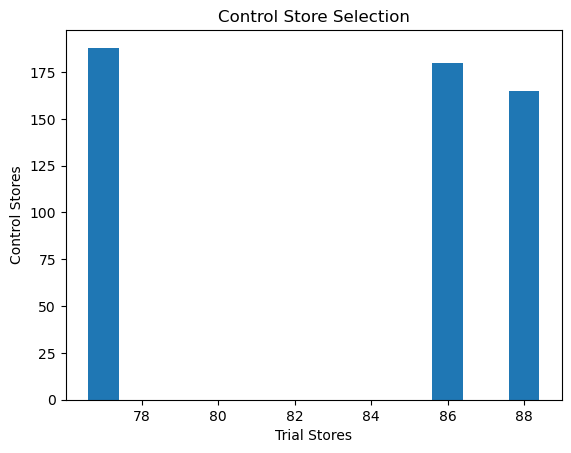

<Figure size 640x480 with 0 Axes>

In [7]:

# Create a bar chart to visualize control stores
plt.bar(trial_stores, control_stores.values())
plt.xlabel('Trial Stores')
plt.ylabel('Control Stores')
plt.title('Control Store Selection')
plt.show()
plt.clf()

### Assessment of the Trial
Compare Trial and Control Stores: For each trial store, compare it individually with its respective control store. Calculate the total sales difference during the trial period and check if it's statistically significant. 

In [8]:
# Perform t-tests to compare trial and control stores
for trial_store, control_store in control_stores.items():
    # Filter data for trial and control stores
    trial_data = monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store]['Total_Sales']
    control_data = monthly_metrics[monthly_metrics['STORE_NBR'] == control_store]['Total_Sales']
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(trial_data, control_data)
    
    # Check if the difference is statistically significant
    if p_value < 0.05:
        print(f"Trial Store {trial_store} is statistically different from Control Store {control_store}")
    else:
        print(f"Trial Store {trial_store} is not statistically different from Control Store {control_store}")


Trial Store 77.0 is not statistically different from Control Store 188.0
Trial Store 86.0 is not statistically different from Control Store 180.0
Trial Store 88.0 is not statistically different from Control Store 165.0


### Visualization
show the sales trends over time for trial and control stores

In [9]:

def Visualization_sales_trend(trial_stores, control_store_mapping):
    for trial_store in trial_stores:
        control_store = control_store_mapping[trial_store]
        
        # Filter data for the trial and control stores
        trial_data = monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store]
        control_data = monthly_metrics[monthly_metrics['STORE_NBR'] == control_store]
        
        # Check if data exists for the control store before plotting
        if not control_data.empty:
            plt.figure(figsize=(10, 6))
            plt.plot(trial_data['MONTH_YEAR'], trial_data['Total_Sales'], label=f'Trial Store {trial_store}')
            plt.plot(control_data['MONTH_YEAR'], control_data['Total_Sales'], label=f'Control Store {control_store}')
            plt.xlabel('Month-Year')
            plt.ylabel('Total Sales')
            plt.title(f'Sales Trends for Trial Store {trial_store} vs. Control Store {control_store}')
            plt.xticks(rotation=45)
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print(f"No data available for Control Store {control_store}")

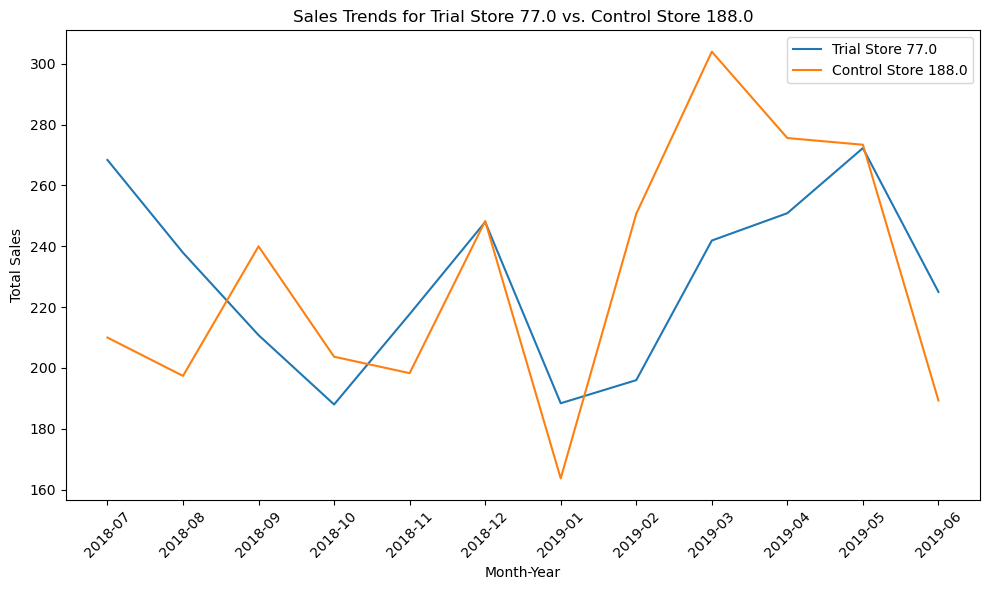

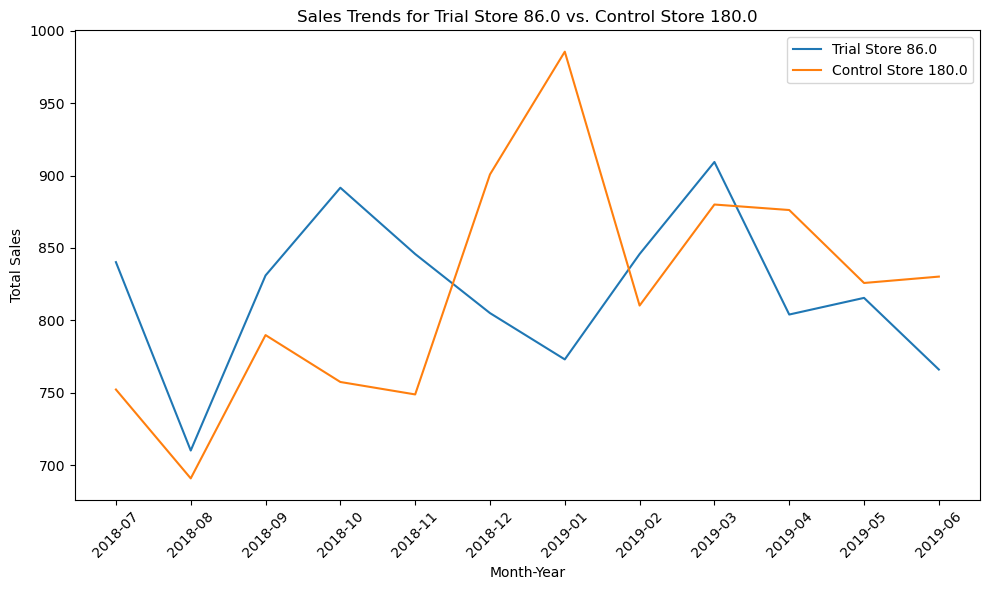

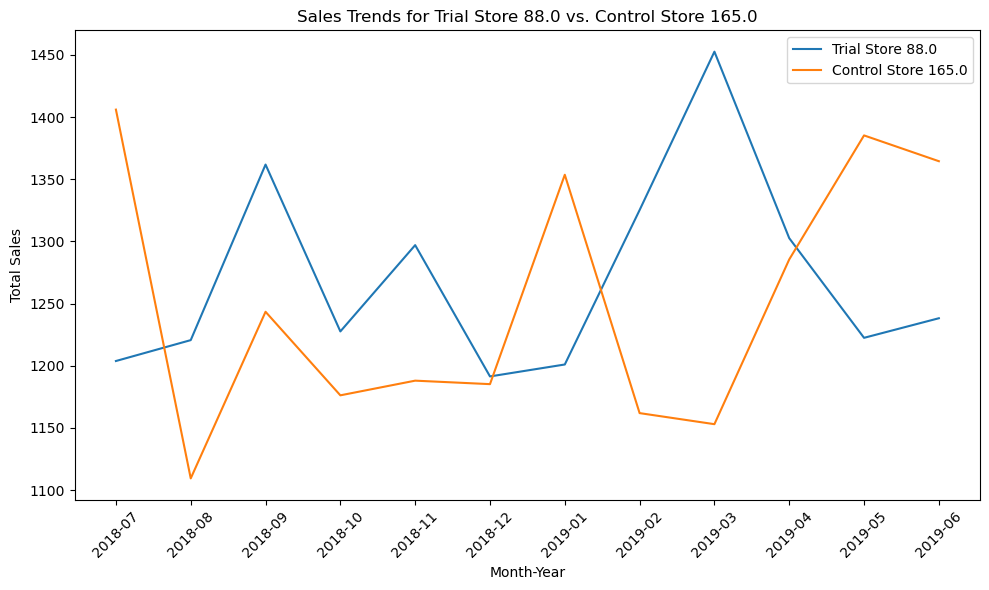

In [10]:
Visualization_sales_trend(trial_stores,control_stores)

### Analyzing the Driver of Change: 
Analyze if the driver of change in total sales is due to more purchasing customers or more purchases per customer during the trial period.

#### Calculate additional metrics for driver of change analysis

In [11]:
def calculate_driver_metrics(trial_store, control_store):
    # Make a copy of the DataFrame to avoid modifying the global DataFrame
    df_copy = monthly_metrics.copy()

    # Set "MONTH_YEAR" as the index in the copy
    df_copy.set_index('MONTH_YEAR', inplace=True)

    # Remove the index name
    df_copy.index.name = None

    trial_total_sales = df_copy[df_copy['STORE_NBR'] == trial_store]['Total_Sales']
    control_total_sales = df_copy[df_copy['STORE_NBR'] == control_store]['Total_Sales']

    trial_total_customers = df_copy[df_copy['STORE_NBR'] == trial_store]['Total_Customers']
    control_total_customers = df_copy[df_copy['STORE_NBR'] == control_store]['Total_Customers']

    trial_avg_transactions_per_customer = trial_total_sales / trial_total_customers
    control_avg_transactions_per_customer = control_total_sales / control_total_customers

    return (
        trial_total_sales, control_total_sales, trial_total_customers, control_total_customers,
        trial_avg_transactions_per_customer, control_avg_transactions_per_customer
    )


### Visualize driver of change metrics

In [12]:
def visualize_driver_metrics(trial_store, control_store):
    # Drop the "MONTH_YEAR" column

    trial_total_sales, control_total_sales, trial_total_customers, control_total_customers, \
    trial_avg_transactions_per_customer, control_avg_transactions_per_customer = calculate_driver_metrics(trial_store, control_store)
    plt.figure(figsize=(17, 8))

    plt.subplot(2, 2, 1)
    plt.plot(trial_total_sales, label='Trial Store')
    plt.plot(control_total_sales, label='Control Store')
    plt.title('Total Sales Over Time')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(trial_total_customers, label='Trial Store')
    plt.plot(control_total_customers, label='Control Store')
    plt.title('Total Customers Over Time')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(trial_avg_transactions_per_customer, label='Trial Store')
    plt.plot(control_avg_transactions_per_customer, label='Control Store')
    plt.title('Average Transactions per Customer Over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()


#### Visualize driver of change metrics for each trial-control pair


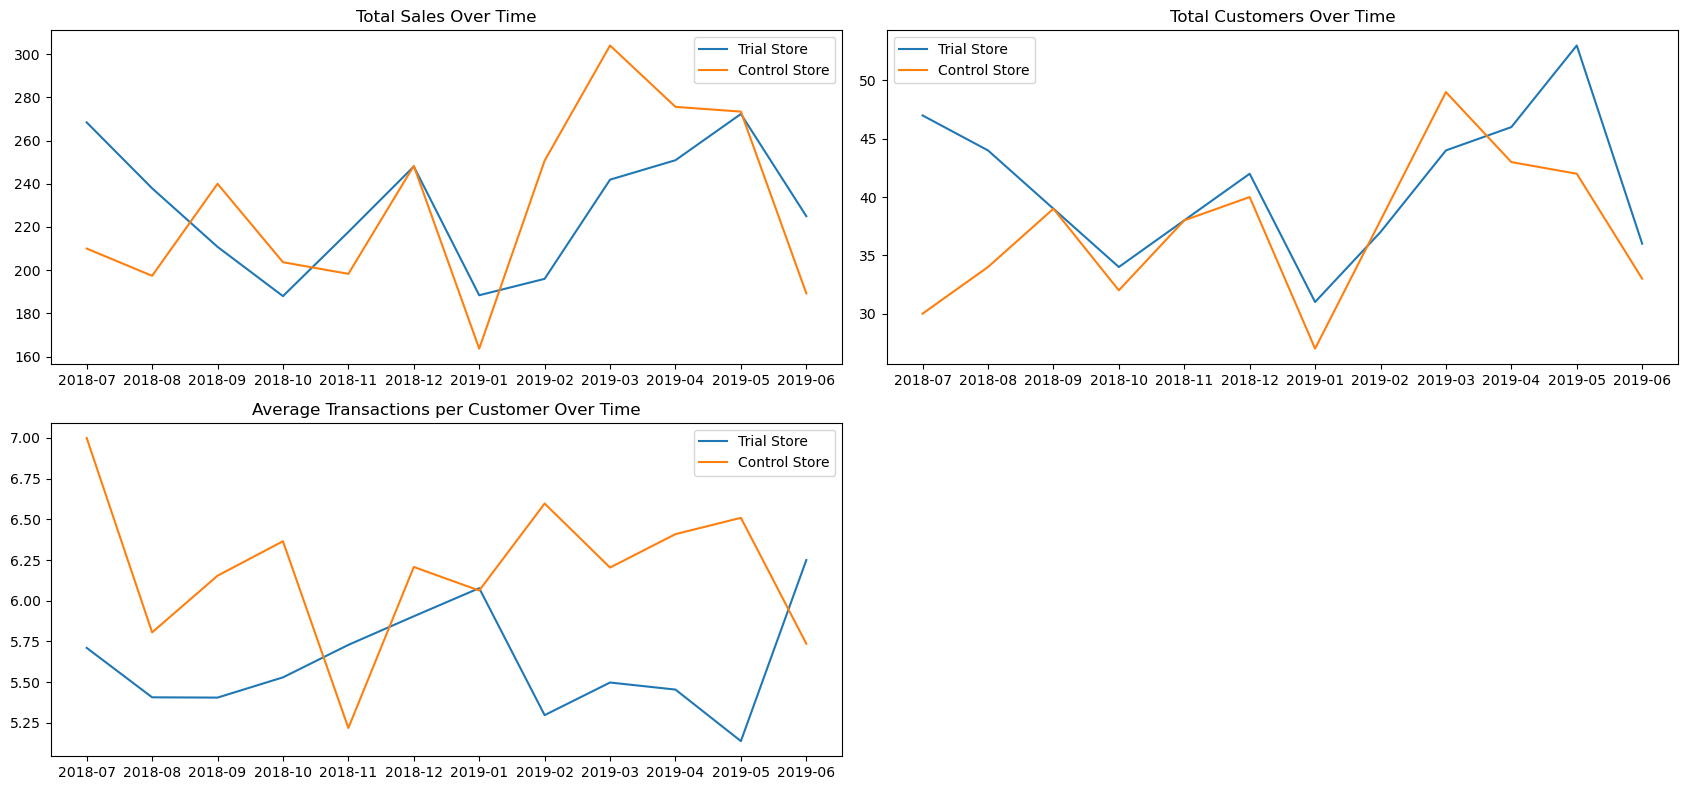

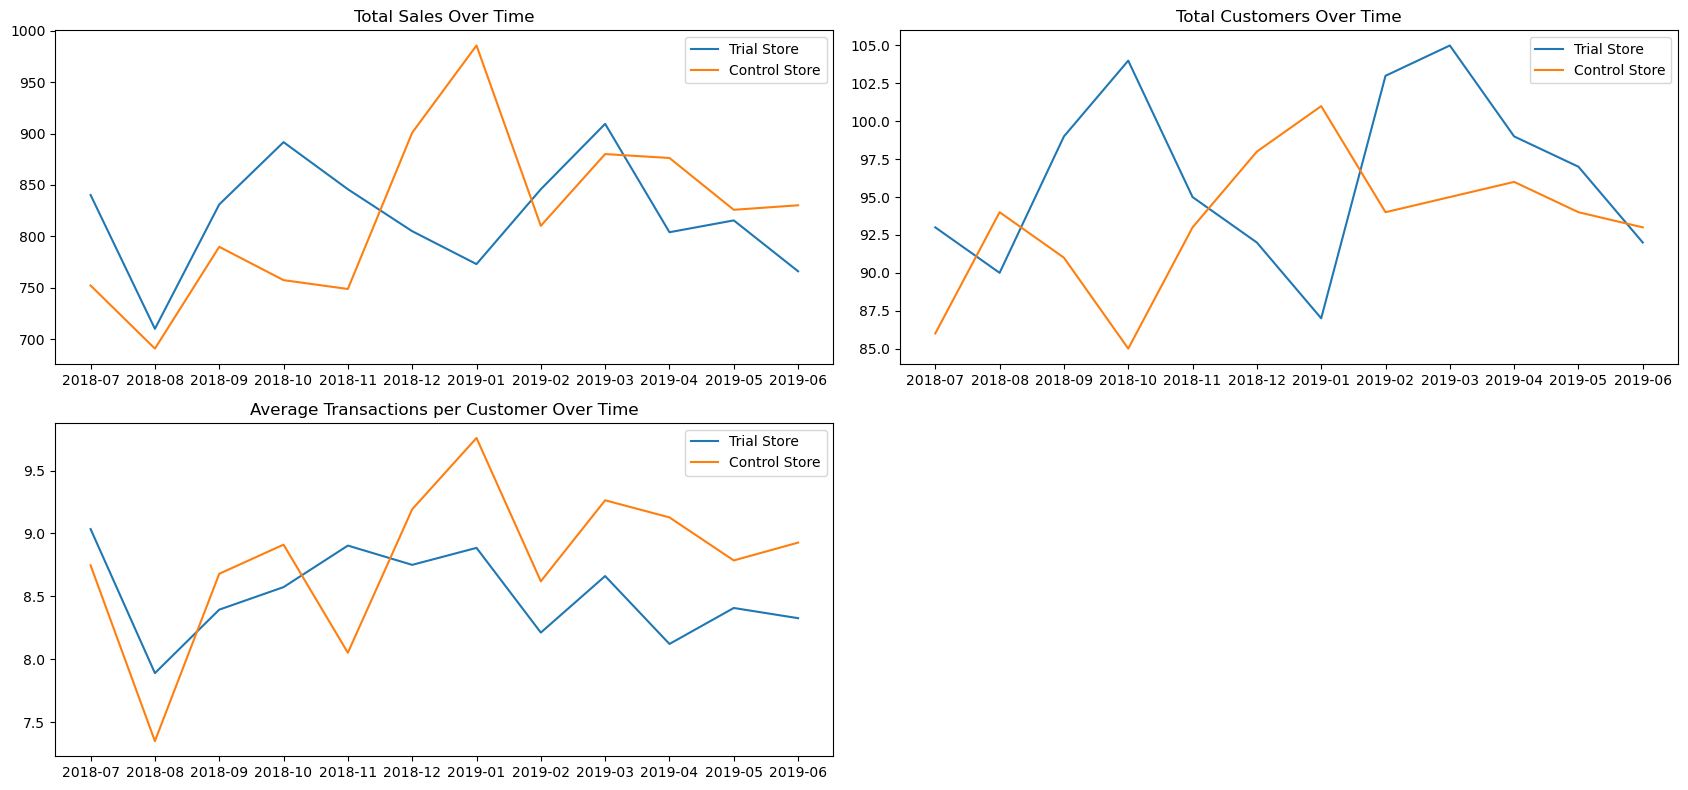

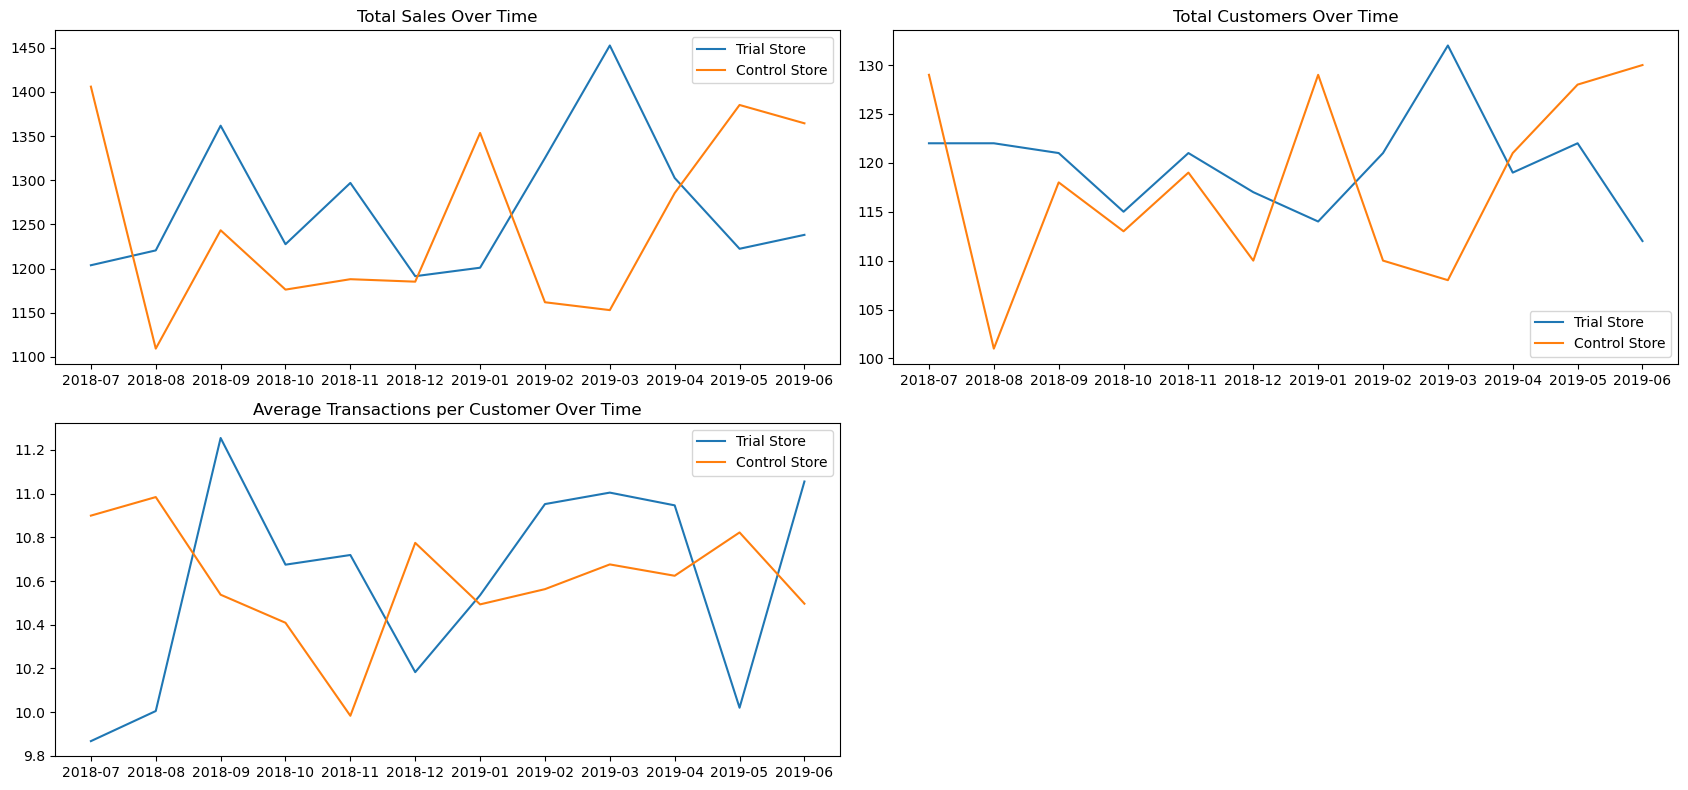

In [13]:
for trial_store, control_store in control_stores.items():
    visualize_driver_metrics(trial_store, control_store)

### Provide recommendations based on analysis

In [14]:
def provide_recommendations(trial_store, control_store,target_month_year):
    trial_total_sales, control_total_sales, _, _, _, _ = calculate_driver_metrics(trial_store, control_store)
    # Convert the index to string format
    trial_total_sales.index = trial_total_sales.index.astype(str)
    control_total_sales.index = control_total_sales.index.astype(str)

    # Filter the data for the trial and control periods based on the target month_year
    trial_period_sales = trial_total_sales.loc[trial_total_sales.index >= target_month_year]
    control_period_sales = control_total_sales.loc[control_total_sales.index >= target_month_year]

    # Calculate the increase in total sales
    total_sales_increase = trial_period_sales.sum() - control_period_sales.sum()



    if total_sales_increase > 0:
        return f"Recommendation for Trial Store {trial_store}: The trial was successful in {target_month_year}. Total sales increased by ${total_sales_increase:.2f} more than the control store {control_store}. \n"
    elif total_sales_increase < 0:
        return f"Recommendation for Trial Store {trial_store}: The trial was not successful in {target_month_year}. Total sales Decreased by ${(control_period_sales.sum() - trial_period_sales.sum()):.2f}, which was lower than the control store {control_store}. \n"

    else:
        return f"Recommendation for Trial Store {trial_store}: The trial Store Compared to Control Store {control_store} the was Constant in Total sales for the year {target_month_year}.\n"
        

### Provide recommendations for each trial-control pair

In [15]:
# Find unique years based on the trial stores in monthly_metrics
unique_years = monthly_metrics[monthly_metrics['STORE_NBR'].isin(trial_stores)]['MONTH_YEAR'].str.split('-').str[0].unique()

for year in unique_years:
    target_month_year = f"{year}-02"  # Change the target month-year as needed
    for trial_store, control_store in control_stores.items():
        recommendation = provide_recommendations(trial_store, control_store, target_month_year)
        print(recommendation)

Recommendation for Trial Store 77.0: The trial was not successful in 2018-02. Total sales Decreased by $9.10, which was lower than the control store 188.0. 

Recommendation for Trial Store 86.0: The trial was not successful in 2018-02. Total sales Decreased by $10.45, which was lower than the control store 180.0. 

Recommendation for Trial Store 88.0: The trial was successful in 2018-02. Total sales increased by $232.30 more than the control store 165.0. 

Recommendation for Trial Store 77.0: The trial was not successful in 2019-02. Total sales Decreased by $106.90, which was lower than the control store 188.0. 

Recommendation for Trial Store 86.0: The trial was not successful in 2019-02. Total sales Decreased by $81.70, which was lower than the control store 180.0. 

Recommendation for Trial Store 88.0: The trial was successful in 2019-02. Total sales increased by $190.90 more than the control store 165.0. 

